# 聚类算法总结

一般聚类算法分为：层次聚类，凝聚-分裂聚类，burch聚类

## K-means 算法

In [240]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans
#1. 聚类首先第一步，构建训练样本点

%matplotlib tk

# python 随机数的生成
# 构建6个簇
# 在100*200的坐标中绘制出这6个簇的数据
random.seed(66)
datas = []
# 第一个簇：20,10
def generate_datas(num = 1000):
    y = []
    
    for i in range(300):
        datas.append([random.gauss(10,5),random.gauss(5,5)])
        y.append(0)
        
    for i in range(200):
        datas.append([random.gauss(50,6),random.gauss(25,7)])
        y.append(1)
    
    for i in range(200):
        datas.append([random.triangular(10,30),random.gauss(30,3)])
        y.append(2)
    
    for i in range(300):
        datas.append([random.triangular(50,60),random.gauss(60,3)])
        y.append(3)
   
    
    for i in range(200):
        datas.append([random.gauss(30,5),random.gauss(60,3)])
        y.append(4)
        
    for i in range(300):
        datas.append([random.triangular(80,120),random.gauss(50,10)])
        y.append(5)
    return datas, y

def plot_cluster(datas, y):
    cm = list('rgbmyc')
    for i in range(len(datas)):
        plt.plot(datas[i][0],datas[i][1],cm[y[i]]+'o')
        
datas, y1 = generate_datas()


In [234]:
#2.2随机选择k个初始数据中心，并且不断迭代
# 使用k_meansII算法找到6个初始样本中心
# 算法：随机选取5个样本点
random.choices(datas,k=2)

[[27.002044539016023, 62.23175210322561],
 [5.154531745707695, 9.099958332526793]]

In [235]:
# random.seed(1)
def init_k_points(data, k):
    points = []
    for i in range(5):
        for j in range(k):
            points.append(random.choice(data))
    # point含有5*k个点，在这5*k个点中找出k个点作为初始中心点，找的方式通过k-means方法来找到k个簇的聚类中心
    k_means(points,points[:6],0)
    return points

def cal_distance(data1, data2):
    return math.sqrt((data1[0]-data2[0])**2 + (data1[1]-data2[1])**2)
    
def k_means(data, k_datas=[], k = 6):
    if len(k_datas) == 0:
        k_datas = init_k_points(data, k)
        k_means(data, k_datas, k)
    #设置迭代次数 iter_num = 100
    #设置中心点位置变化率 err = 1e3
    #设置簇类中的类别的变化 change = False
    #上述三个满足其一即可退出循环
    iter_num = 0
    err = 100
    change = True
    
    clusters = [[]]*6
    clusters = [ [data] for data in datas[:5]]
    clusters[-1] = datas[5:]
    
    while iter_num < 10 and err >1e-3 and change != False:
        #遍历簇
        for data in range(len(datas)):
            #遍历每个簇的点
            for index in range(len(k_datas)):
                nice_center_point_index = 0
                tiny_distance = 1e4
                
                for i in range(len(k_datas)):
                    dist = cal_distance(data, k_datas[i])
                if  dist < tiny_distance:
                    tiny_distance = dist
                    nice_center_point_index = i
                    print(nice_center_point_index)
                print(clusters)
                clusters[nice_center_point_index].append(data)
                print(clusters)
        #计算中心点
        for i in range(len(clusters)):
            center_x = 0.0
            center_y = 0.0
            for j in range(len(clusters[i])):
                center_x += clusters[i][0]
                center_y += clusters[i][1]
            k_datas[i] = [center_x/len(clusters[i]),center_y/len(clusters)]
                
            
                    
                
    
    
    
    

In [236]:
km = KMeans(n_clusters = 6, init='k-means++', max_iter=100, tol = 1e-4)
km.fit(datas)
y = km.predict(datas)

In [237]:
print("所有样本距离所属簇中心点的总距离和为:%.5f" % km.inertia_)
print("所有样本距离所属簇中心点的平均距离为:%.5f" % (km.inertia_ / len(datas)))

print("所有的中心点聚类中心坐标:")
cluter_centers = km.cluster_centers_
print(cluter_centers)

print("score其实就是所有样本点离所属簇中心点距离和的相反数:")
print(km.score(datas))

所有样本距离所属簇中心点的总距离和为:98034.49474
所有样本距离所属簇中心点的平均距离为:65.35633
所有的中心点聚类中心坐标:
[[ 20.48544509  29.62055902]
 [ 54.91985378  59.76423226]
 [ 99.31575874  50.13239448]
 [  9.97976343   5.01808335]
 [ 50.0396447   24.85738392]
 [ 29.7403624   59.98771386]]
score其实就是所有样本点离所属簇中心点距离和的相反数:
-98034.4947388


['r', 'g', 'b', 'm', 'y', 'c']
[3 3 3 ..., 2 2 2]


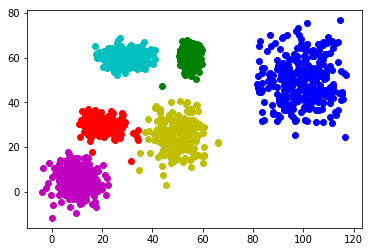

In [238]:
# 画图
cm = list('rgbmyc')
print(cm)
print(y)
for index in range(len(datas)):
    plt.plot(datas[index][0], datas[index][1], cm[y[index]]+'o')


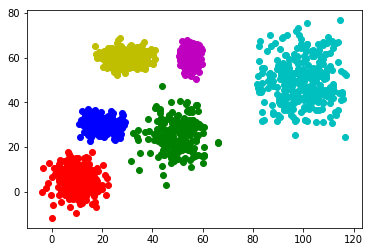

In [239]:
plot_cluster(datas, y1)

In [158]:
cluster = [[]]*6
cluster[1] = 2
cluster[3] = [3,2]
cluster[3].append([2,3])
cluster[4].append([3,1])
clusters


[[[29.627977225182306, 53.16721557443115]],
 [[11.91846845427817, 8.981726070251828]],
 [[7.405005661330953, 4.503490989605696]],
 [[100.29171776018127, 55.178736947152956]],
 [[98.04012773931296, 58.12745736601538]]]

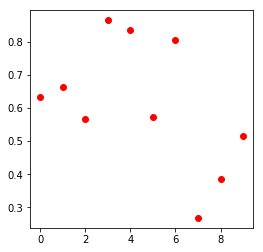

In [159]:
%matplotlib inline
plt.figure(figsize=(4,4))
plt.ylim =(0,1)
for i in range(10):
    #对称分布？
    y = random.triangular()
    plt.plot(i,y,'ro')


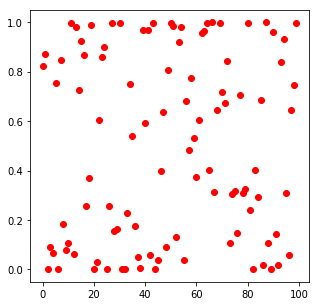

In [160]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.ylim =(0,1)
for i in range(100):
    #beta分布
    y = random.betavariate(0.3,0.3)
    plt.plot(i,y,'ro')

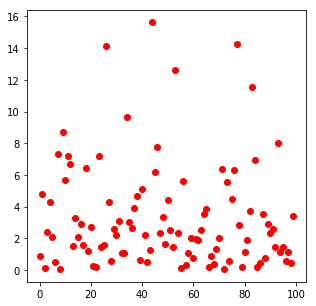

In [161]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.ylim =(0,1)
for i in range(100):   
    #指数分布
    y = random.expovariate(0.3)
    plt.plot(i,y,'ro')

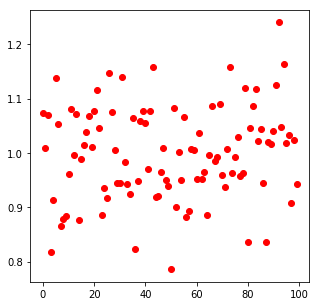

In [162]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.ylim =(0,1)
for i in range(100):   
    #指数分布
    y = random.gauss(1,0.1)
    plt.plot(i,y,'ro')